In [1]:
# identify Variables that will be used to predict  the target variables:
vars = ['A03210','N1','N03210','N02300','STATE','A00200','A00300','A01000'
              ,'A01750','A02500','A03220','A03300','A03270','A03150'
              ,'A18500','A18800','A19300','A19700','A07100','A11900']


predictors = ['STATE','A00200','A00300','A01000'
              ,'A01750','A02500','A03220','A03300','A03270','A03150'
              ,'A18500','A18800','A19300','A19700','A07100','A11900']

Targets =  ['A03210','N1', 'N02300', 'N03210']

In [2]:
# Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib
import datetime 
# plotting
import matplotlib as mpl
# machline learning package 
import sklearn as skl
# package to use regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
#making the imports
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#import pandas as pd
# save to a dataFolder
# open the excel file, delete the first row, save the file. Hint: use header parameter in the read_excel function.
dataFolder = 'E:\Rizwan study\ML Task/'
# = pd.read_excel(dataFolder + "18zpallnoagi.csv")
df = pd.read_csv(dataFolder + "18zpallnoagi.csv", sep=",")
#df = pd.read_csv(dataFolder + "18zpallnoagi.csv", usecols=vars )

In [4]:
#Data Cleaning 
df.head(3)

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2036290.0,853350.0,746450.0,393790.0,1851240.0,93480.0,...,36360.0,140470.0,388540.0,1734772.0,1602800.0,5324632.0,1570180.0,4701007.0,36520.0,559783.0
1,1,AL,35004,0,5200.0,2150.0,2100.0,820.0,4730.0,260.0,...,20.0,63.0,1000.0,3171.0,4090.0,11131.0,4050.0,10654.0,50.0,433.0
2,1,AL,35005,0,3190.0,1410.0,840.0,890.0,2880.0,160.0,...,0.0,0.0,530.0,1179.0,2630.0,7589.0,2630.0,7558.0,0.0,0.0


In [5]:
#Remove the Zipcode in ("0","99999")
df.drop(df.loc[df['ZIPCODE']==0].index, inplace=True)
df = df[df['ZIPCODE'] != 99999]


In [6]:
df.shape

(27556, 153)

In [7]:
# Selecting only specific variables to be pulled from dataset
df = pd.read_csv(dataFolder + '18zpallnoagi.csv', usecols=vars)
df

,STATE,N1,A00200,A00300,A01000,A01750,N02300,A02500,A03220,A03300,A03270,A03150,N03210,A03210,A18500,A18800,A19300,A19700,A07100,A11900
0,AL,2036290.0,86880345.0,872091.0,4819405.0,14292349.0,37590.0,4665477.0,10826.0,113453.0,287347.0,93572.0,133620.0,143527.0,337110.0,49390.0,1262640.0,2380707.0,1461010.0,5324632.0
1,AL,5200.0,245939.0,953.0,2649.0,26995.0,80.0,9998.0,29.0,0.0,269.0,178.0,580.0,619.0,303.0,83.0,2147.0,4361.0,4393.0,11131.0
2,AL,3190.0,107771.0,361.0,341.0,15232.0,60.0,4796.0,12.0,0.0,0.0,81.0,200.0,225.0,211.0,115.0,1031.0,1822.0,1876.0,7589.0
3,AL,1240.0,50659.0,115.0,115.0,9377.0,20.0,2974.0,0.0,0.0,0.0,96.0,50.0,37.0,24.0,13.0,143.0,265.0,906.0,2834.0
4,AL,12050.0,578197.0,2512.0,12217.0,71306.0,170.0,25669.0,86.0,0.0,1792.0,562.0,1230.0,1368.0,1370.0,426.0,7050.0,11347.0,10615.0,24590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27653,WY,200.0,7831.0,93.0,1200.0,1969.0,0.0,678.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,439.0
27654,WY,1620.0,64861.0,1345.0,7792.0,32832.0,50.0,8097.0,8.0,0.0,433.0,226.0,90.0,91.0,747.0,109.0,1898.0,2157.0,1351.0,3799.0
27655,WY,950.0,46751.0,2309.0,31415.0,7958.0,50.0,2866.0,0.0,0.0,280.0,196.0,60.0,64.0,480.0,27.0,1242.0,1305.0,839.0,6455.0
27656,WY,230.0,17438.0,832.0,17602.0,3542.0,0.0,1207.0,0.0,0.0,192.0,0.0,0.0,0.0,650.0,26.0,913.0,1073.0,296.0,3403.0


In [8]:
df.shape

(27658, 20)

In [9]:
# Variables separation for scaling
varsToScale = vars

noScaleVars = ['STATE', 'N1', 'N03210']

In [10]:
# Remove Variables

for var in noScaleVars:
    varsToScale.remove(var)
 

In [11]:
print(vars)

['A03210', 'N02300', 'A00200', 'A00300', 'A01000', 'A01750', 'A02500', 'A03220', 'A03300', 'A03270', 'A03150', 'A18500', 'A18800', 'A19300', 'A19700', 'A07100', 'A11900']


In [12]:
df.shape

(27658, 20)

In [13]:
  #Create variables scaled by number of returns; N1
n1ScaledVars = []
for var in varsToScale:
    newVar = var + 'Scaled'
    df[newVar] = df[var]/df['N1']
    n1ScaledVars.append(newVar)

In [14]:
df.head(3)

,STATE,N1,A00200,A00300,A01000,A01750,N02300,A02500,A03220,A03300,...,A03220Scaled,A03300Scaled,A03270Scaled,A03150Scaled,A18500Scaled,A18800Scaled,A19300Scaled,A19700Scaled,A07100Scaled,A11900Scaled
0,AL,2036290.0,86880345.0,872091.0,4819405.0,14292349.0,37590.0,4665477.0,10826.0,113453.0,...,0.005317,0.055716,0.141113,0.045952,0.165551,0.024255,0.620069,1.169139,0.717486,2.614869
1,AL,5200.0,245939.0,953.0,2649.0,26995.0,80.0,9998.0,29.0,0.0,...,0.005577,0.000000,0.051731,0.034231,0.058269,0.015962,0.412885,0.838654,0.844808,2.140577
2,AL,3190.0,107771.0,361.0,341.0,15232.0,60.0,4796.0,12.0,0.0,...,0.003762,0.000000,0.000000,0.025392,0.066144,0.036050,0.323197,0.571160,0.588088,2.378997


In [15]:
df.columns

Index(['STATE', 'N1', 'A00200', 'A00300', 'A01000', 'A01750', 'N02300',
       'A02500', 'A03220', 'A03300', 'A03270', 'A03150', 'N03210', 'A03210',
       'A18500', 'A18800', 'A19300', 'A19700', 'A07100', 'A11900',
       'A03210Scaled', 'N02300Scaled', 'A00200Scaled', 'A00300Scaled',
       'A01000Scaled', 'A01750Scaled', 'A02500Scaled', 'A03220Scaled',
       'A03300Scaled', 'A03270Scaled', 'A03150Scaled', 'A18500Scaled',
       'A18800Scaled', 'A19300Scaled', 'A19700Scaled', 'A07100Scaled',
       'A11900Scaled'],
      dtype='object')

In [16]:
print(predictors)

['STATE', 'A00200', 'A00300', 'A01000', 'A01750', 'A02500', 'A03220', 'A03300', 'A03270', 'A03150', 'A18500', 'A18800', 'A19300', 'A19700', 'A07100', 'A11900']


In [17]:
#Remove unscaled continuous predictors
predictorsToRemove = predictors
predictorsToRemove.remove('STATE')

In [18]:
print(predictors)

['A00200', 'A00300', 'A01000', 'A01750', 'A02500', 'A03220', 'A03300', 'A03270', 'A03150', 'A18500', 'A18800', 'A19300', 'A19700', 'A07100', 'A11900']


In [19]:
df.drop(predictorsToRemove, axis=1, inplace=True)


In [20]:
print(predictors)

['A00200', 'A00300', 'A01000', 'A01750', 'A02500', 'A03220', 'A03300', 'A03270', 'A03150', 'A18500', 'A18800', 'A19300', 'A19700', 'A07100', 'A11900']


In [21]:
df.shape

(27658, 22)

In [22]:
#Setup bonus target
df['A03210' +'Bonus'] = df['A03210']/df['N03210']

In [23]:
print('Count of Zeros in N03210:')
print((df['N03210']==0).sum())

Count of Zeros in N03210:
4722


In [24]:
print(Targets)

['A03210', 'N1', 'N02300', 'N03210']


In [25]:
#Drop nuisance target variables
df.drop(Targets, axis=1, inplace=True)

In [26]:
print(Targets)

['A03210', 'N1', 'N02300', 'N03210']


In [27]:
#Setup Binary Target 3
df['N02300ScaledBinary'] = df['N02300Scaled'].apply(lambda x: 1 if x<=.02 else 0)

In [28]:
#Preview the dataset
df.head()
print('Rows and Columns of dataset:')
df.shape

Rows and Columns of dataset:


(27658, 20)

In [29]:
df.shape

(27658, 20)

In [30]:
df.columns

Index(['STATE', 'A03210Scaled', 'N02300Scaled', 'A00200Scaled', 'A00300Scaled',
       'A01000Scaled', 'A01750Scaled', 'A02500Scaled', 'A03220Scaled',
       'A03300Scaled', 'A03270Scaled', 'A03150Scaled', 'A18500Scaled',
       'A18800Scaled', 'A19300Scaled', 'A19700Scaled', 'A07100Scaled',
       'A11900Scaled', 'A03210Bonus', 'N02300ScaledBinary'],
      dtype='object')

In [31]:
#EDA
df[n1ScaledVars].describe()

,A03210Scaled,N02300Scaled,A00200Scaled,A00300Scaled,A01000Scaled,A01750Scaled,A02500Scaled,A03220Scaled,A03300Scaled,A03270Scaled,A03150Scaled,A18500Scaled,A18800Scaled,A19300Scaled,A19700Scaled,A07100Scaled,A11900Scaled
count,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000
mean,0.067633,0.027209,44.422859,0.564403,3.912291,7.032602,2.401351,0.003793,0.079552,0.156936,0.045265,0.430242,0.017099,0.659882,0.734202,0.726997,2.543877
std,0.044614,0.027556,22.950121,2.428425,20.036335,3.876793,1.232024,0.003739,0.269231,0.223113,0.054581,0.932416,0.031492,1.095673,2.595536,0.480113,2.501017
min,0.000000,0.000000,3.953571,0.000000,-0.073171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000
25%,0.038679,0.000000,33.100000,0.144922,0.536970,4.727598,1.694388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543112,2.028371
50%,0.068238,0.022657,38.463633,0.276376,1.291322,6.353466,2.251390,0.003945,0.000000,0.089616,0.027621,0.132279,0.003685,0.247225,0.324638,0.655556,2.254545
75%,0.097773,0.041474,47.698664,0.499534,2.811634,8.515536,2.907841,0.006338,0.027328,0.219543,0.079538,0.432359,0.020984,0.779956,0.727902,0.801919,2.552632
max,0.361562,0.522523,645.274303,248.430769,2149.411538,102.680769,20.391667,0.100000,4.922137,2.888889,0.468000,38.688462,0.480000,10.384121,131.452195,24.526923,235.046154


In [32]:
df['STATE'].count()

27658

In [33]:
df.isnull().sum()

STATE                    0
A03210Scaled             0
N02300Scaled             0
A00200Scaled             0
A00300Scaled             0
A01000Scaled             0
A01750Scaled             0
A02500Scaled             0
A03220Scaled             0
A03300Scaled             0
A03270Scaled             0
A03150Scaled             0
A18500Scaled             0
A18800Scaled             0
A19300Scaled             0
A19700Scaled             0
A07100Scaled             0
A11900Scaled             0
A03210Bonus           4722
N02300ScaledBinary       0
dtype: int64

In [34]:
###Target 1: Continuous target =
#Student loan interest deduction amount [A03210]/ Number of returns [N1] = A03210Scaled

In [35]:
df.head(5)

,STATE,A03210Scaled,N02300Scaled,A00200Scaled,A00300Scaled,A01000Scaled,A01750Scaled,A02500Scaled,A03220Scaled,A03300Scaled,A03270Scaled,A03150Scaled,A18500Scaled,A18800Scaled,A19300Scaled,A19700Scaled,A07100Scaled,A11900Scaled,A03210Bonus,N02300ScaledBinary
0,AL,0.070485,0.018460,42.665998,0.428274,2.366758,7.018818,2.291165,0.005317,0.055716,0.141113,0.045952,0.165551,0.024255,0.620069,1.169139,0.717486,2.614869,1.074143,1
1,AL,0.119038,0.015385,47.295962,0.183269,0.509423,5.191346,1.922692,0.005577,0.000000,0.051731,0.034231,0.058269,0.015962,0.412885,0.838654,0.844808,2.140577,1.067241,1
2,AL,0.070533,0.018809,33.784013,0.113166,0.106897,4.774922,1.503448,0.003762,0.000000,0.000000,0.025392,0.066144,0.036050,0.323197,0.571160,0.588088,2.378997,1.125000,1
3,AL,0.029839,0.016129,40.854032,0.092742,0.092742,7.562097,2.398387,0.000000,0.000000,0.000000,0.077419,0.019355,0.010484,0.115323,0.213710,0.730645,2.285484,0.740000,1
4,AL,0.113527,0.014108,47.983154,0.208465,1.013859,5.917510,2.130207,0.007137,0.000000,0.148714,0.046639,0.113693,0.035353,0.585062,0.941660,0.880913,2.040664,1.112195,1


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:

from sklearn.preprocessing import StandardScaler

In [38]:

scaler=StandardScaler()
scaler.fit(df[n1ScaledVars])

StandardScaler()

In [39]:
scaled_data=scaler.transform(df[n1ScaledVars])


In [40]:
scaled_data

array([[ 0.06391727, -0.31752116, -0.07655265, ...,  0.16757445,
        -0.01980898,  0.02838587],
       [ 1.15225151, -0.42913018,  0.12519127, ...,  0.04024371,
         0.24538646, -0.16125734],
       [ 0.06500121, -0.30486537, -0.46357221, ..., -0.06281738,
        -0.28933048, -0.06592641],
       ...,
       [-0.00593083,  0.92258353,  0.2086615 , ...,  0.24638222,
         0.32526535,  1.69968343],
       [-1.51599189, -0.98744672,  1.36797099, ...,  1.51455655,
         1.16632967,  4.89880633],
       [-0.71120666,  0.25129604, -0.04319516, ...,  0.02854141,
        -0.24582284,  0.83618242]])

In [41]:
from sklearn.decomposition import PCA

# PCA

In [42]:
pca=PCA(n_components=2)

In [43]:

pca.fit(scaled_data)

PCA(n_components=2)

In [44]:
x_pca=pca.transform(scaled_data)

In [45]:

scaled_data.shape

(27658, 17)

In [46]:

x_pca.shape

(27658, 2)

In [47]:
scaled_data

array([[ 0.06391727, -0.31752116, -0.07655265, ...,  0.16757445,
        -0.01980898,  0.02838587],
       [ 1.15225151, -0.42913018,  0.12519127, ...,  0.04024371,
         0.24538646, -0.16125734],
       [ 0.06500121, -0.30486537, -0.46357221, ..., -0.06281738,
        -0.28933048, -0.06592641],
       ...,
       [-0.00593083,  0.92258353,  0.2086615 , ...,  0.24638222,
         0.32526535,  1.69968343],
       [-1.51599189, -0.98744672,  1.36797099, ...,  1.51455655,
         1.16632967,  4.89880633],
       [-0.71120666,  0.25129604, -0.04319516, ...,  0.02854141,
        -0.24582284,  0.83618242]])

In [48]:
x_pca

array([[-0.07538008, -0.13077031],
       [-0.4970597 , -0.24479758],
       [-1.0558744 ,  0.2374307 ],
       ...,
       [ 2.28442281,  0.23131404],
       [ 7.3654708 ,  2.50834441],
       [ 0.41279031,  0.53500026]])

Text(0, 0.5, 'Second principle component')

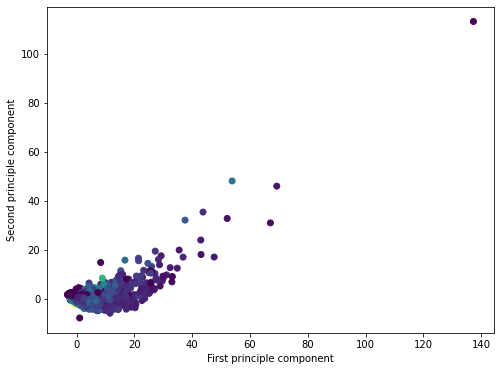

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['A03210Scaled'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [50]:
# Check for multicollinearity between predictive variables.
# Also check correlations to continuous targets.
corrMatrixVars = list(df.columns)
corrMatrixVars.remove('N02300ScaledBinary')
corrMatrixVars.remove('N02300Scaled')

df[corrMatrixVars].corr()

,A03210Scaled,A00200Scaled,A00300Scaled,A01000Scaled,A01750Scaled,A02500Scaled,A03220Scaled,A03300Scaled,A03270Scaled,A03150Scaled,A18500Scaled,A18800Scaled,A19300Scaled,A19700Scaled,A07100Scaled,A11900Scaled,A03210Bonus
A03210Scaled,1.000000,0.241012,0.008831,0.002110,0.061772,0.004824,0.470188,0.079015,0.205226,0.395568,0.112737,0.155524,0.159651,0.046402,0.122609,-0.029844,0.546177
A00200Scaled,0.241012,1.000000,0.482396,0.525856,0.368484,0.294192,0.326023,0.811609,0.648460,0.505807,0.846428,0.503472,0.815447,0.603247,0.742773,0.540161,0.298634
A00300Scaled,0.008831,0.482396,1.000000,0.921700,0.327927,0.258918,0.039797,0.456280,0.425170,0.196439,0.649649,0.177645,0.356567,0.770672,0.742018,0.923493,0.121503
A01000Scaled,0.002110,0.525856,0.921700,1.000000,0.336336,0.255977,0.028770,0.488300,0.437304,0.196898,0.667137,0.212305,0.382325,0.825573,0.749796,0.945707,0.121935
A01750Scaled,0.061772,0.368484,0.327927,0.336336,1.000000,0.881345,0.199971,0.384065,0.433792,0.365027,0.504733,0.318831,0.491711,0.330970,0.279606,0.278119,0.207956
A02500Scaled,0.004824,0.294192,0.258918,0.255977,0.881345,1.000000,0.099746,0.331234,0.474867,0.320292,0.420139,0.209398,0.379732,0.261000,0.211085,0.188742,0.174436
A03220Scaled,0.470188,0.326023,0.039797,0.028770,0.199971,0.099746,1.000000,0.206886,0.280631,0.531207,0.306709,0.284782,0.368240,0.100443,0.197921,0.038843,0.294062
A03300Scaled,0.079015,0.811609,0.456280,0.488300,0.384065,0.331234,0.206886,1.000000,0.695610,0.460941,0.815101,0.423082,0.746153,0.574005,0.607815,0.518121,0.245543
A03270Scaled,0.205226,0.648460,0.425170,0.437304,0.433792,0.474867,0.280631,0.695610,1.000000,0.599279,0.692576,0.405403,0.665514,0.469612,0.540244,0.424367,0.209256
A03150Scaled,0.395568,0.505807,0.196439,0.196898,0.365027,0.320292,0.531207,0.460941,0.599279,1.000000,0.510126,0.419019,0.600862,0.261630,0.328594,0.167223,0.319651


predictor is ['A00200Scaled', 'A00300Scaled', 'A01000Scaled', 'A01750Scaled', 'A02500Scaled', 'A03220Scaled', 'A03300Scaled', 'A03270Scaled', 'A03150Scaled', 'A18500Scaled', 'A18800Scaled', 'A19300Scaled', 'A19700Scaled', 'A07100Scaled', 'A11900Scaled'] and target is A03210Scaled
Coefficients: 
 [ 1.04131317e-03  1.66395476e-03  2.08726070e-03  1.58101131e-03
 -1.93608008e-02  3.27195197e+00 -4.47915085e-02  4.30575854e-02
  1.92588548e-01 -2.78021581e-02  4.13161767e-01 -2.81789234e-03
  5.09766395e-03 -4.53056402e-03 -1.57835275e-02]
Mean squared error: 0.00
Variance score: 0.62


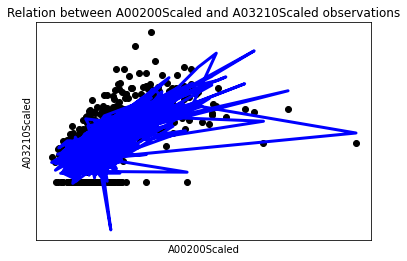

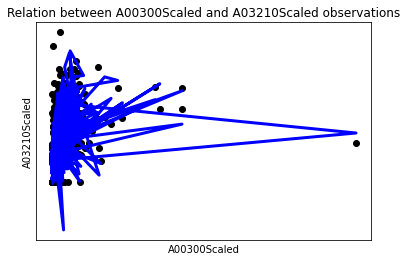

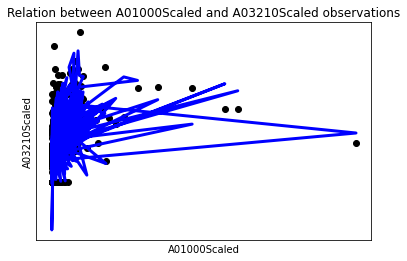

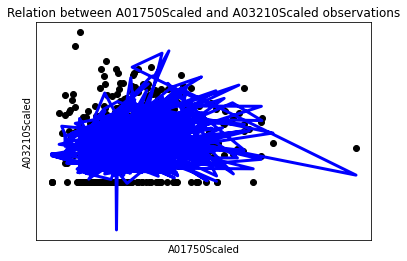

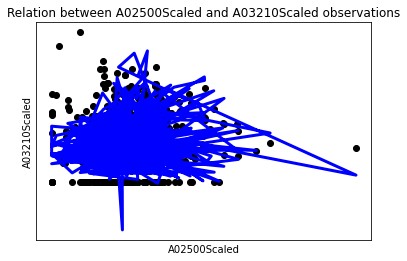

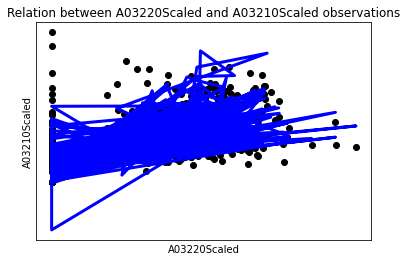

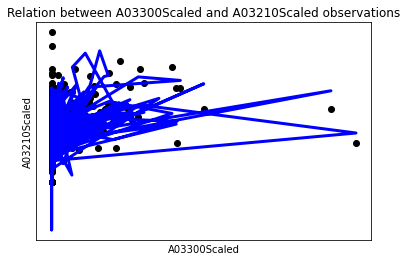

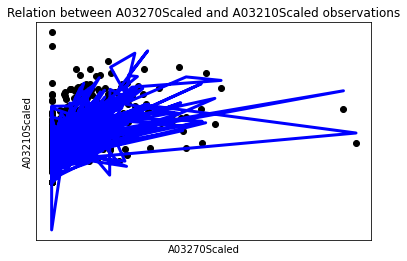

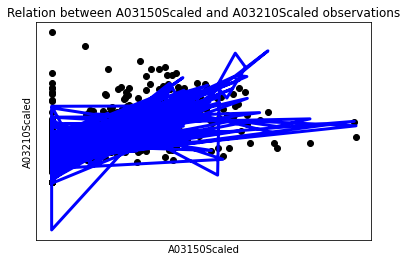

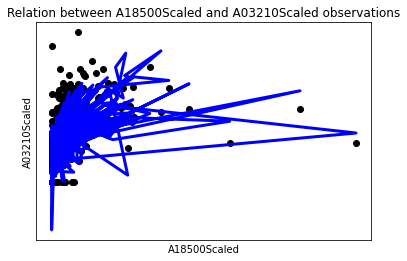

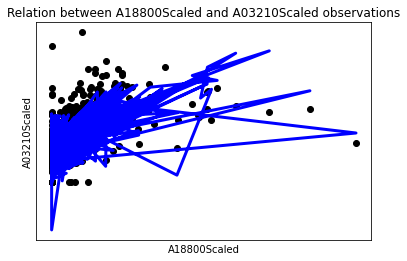

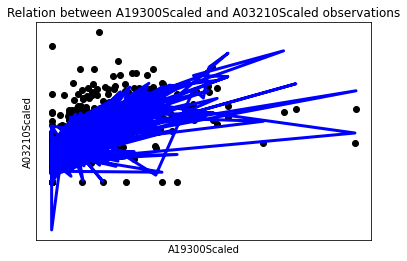

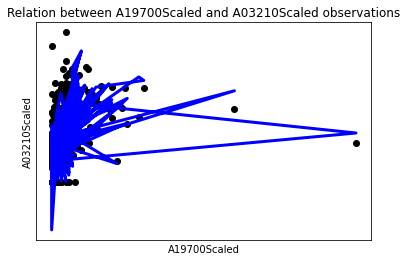

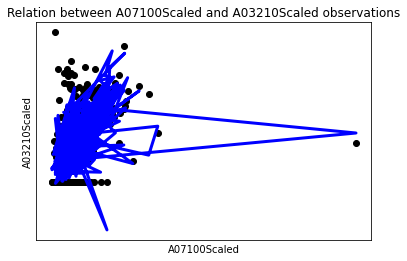

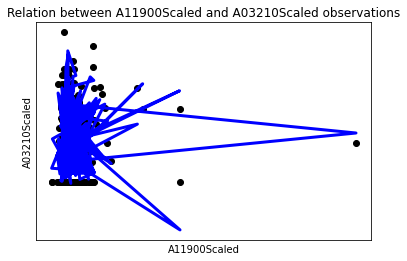

In [51]:
from distutils.version import LooseVersion
# Plot outputs
# 'normed' is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}
    
#the number of observations that you will run your regression.
numobs = 700
# plot x （the ith predictor), y, y_pred, x_label, y_label 
def myPlot(predictors, target, x, y, y_pred):
    for i in range(len(predictors)):
        plt.figure(i)
        #plt.hist(x, bins=10, range=(20., 80.), edgecolor='k', **density_param)
#         print(x[:numobs,i].flatten().shape)
#         print(x[:numobs,i].shape)
#         print(y[:numobs].flatten().shape)
#         print(y[:numobs].shape)
        
#         plt.scatter(x[:numobs,i].flatten(), y[:numobs].flatten(),  color='black')
#         plt.plot(x[:numobs,i].flatten(), y_pred[:numobs].flatten(), color='blue', linewidth=3)
#         #plt.scatter(x[5], y[5],  color='black')
        plt.scatter(x[:numobs,i], y[:numobs],  color='black')
        plt.plot(x[:numobs,i], y_pred[:numobs], color='blue', linewidth=3)
        #plt.scatter(x[5], y[5],  color='black')
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(predictors[i])
        plt.ylabel(target)
        plt.title("Relation between %s and %s observations" %(predictors[i], target)    )
       
        plt.show()
        plt.close(i)
    return

# my prective model
def myPredictiveModel(predictors, target):
    print("predictor is %s and target is %s" %(predictors, target))
    x = df[predictors].head(numobs).values
    y = df[target].head(numobs).values
    
    # first regression method using sklearn
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Train the model
    regrResult = regr.fit(x, y)
    
    # Make predictions
    y_pred = regr.predict(x)

    
   
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y, y_pred))

    # Plot outputs
    #plt.scatter(x, y,  color='black')
    #plt.plot(x, y_pred, color='blue', linewidth=3)
       
   
   
    myPlot(predictors, target, x, y, y_pred)

# one predictor
#myPredictiveModel(["AGE"], "BILL_AMT1")
# three predictors
myPredictiveModel(['A00200Scaled', 'A00300Scaled',
       'A01000Scaled', 'A01750Scaled', 'A02500Scaled', 'A03220Scaled',
       'A03300Scaled', 'A03270Scaled', 'A03150Scaled', 'A18500Scaled',
       'A18800Scaled', 'A19300Scaled', 'A19700Scaled', 'A07100Scaled',
       'A11900Scaled'], 'A03210Scaled')

In [52]:

X = df[['A00200Scaled', 'A00300Scaled',
       'A01000Scaled', 'A01750Scaled', 'A02500Scaled', 'A03220Scaled',
       'A03300Scaled', 'A03270Scaled', 'A03150Scaled', 'A18500Scaled',
       'A18800Scaled', 'A19300Scaled', 'A19700Scaled', 'A07100Scaled',
       'A11900Scaled']]
y =  df['N02300ScaledBinary']
myPredictiveModel=(['A00200Scaled', 'A00300Scaled',
       'A01000Scaled', 'A01750Scaled', 'A02500Scaled', 'A03220Scaled',
       'A03300Scaled', 'A03270Scaled', 'A03150Scaled', 'A18500Scaled',
       'A18800Scaled', 'A19300Scaled', 'A19700Scaled', 'A07100Scaled',
       'A11900Scaled'], 'A03210Scaled')

In [53]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [54]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [55]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1 1 1 ... 0 1 0]
binary
binary
binary


In [56]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.6182212581344902

In [58]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.6514822848879248

In [59]:
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [61]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

C:\Users\US\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7481923355025307

In [62]:
# Train with Standard scaled Data
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

C:\Users\US\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7481923355025307

In [63]:

# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\US\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_paralle...0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
        

In [64]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [65]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
import sklearn_crfsuite
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
 
xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)

[13:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


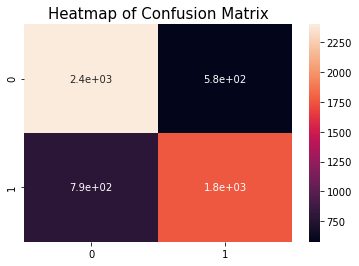

In [68]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [69]:
print(classification_report(y_test, y_pred_xgb_pt))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2978
           1       0.75      0.69      0.72      2554

    accuracy                           0.75      5532
   macro avg       0.75      0.75      0.75      5532
weighted avg       0.75      0.75      0.75      5532



# Random Forest

In [70]:
#make the imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#doing the train test split (80% training data and 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
 
#fit the data to default Random Forest classifier.
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
#make the imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#doing the train test split (80% training data and 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
 
#fit the data to default Random Forest classifier.
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
 

RandomForestClassifier()

Precision Score: 0.7631247375052499

Recall Score: 0.713668499607227

Accuracy Score: 0.7662689804772235



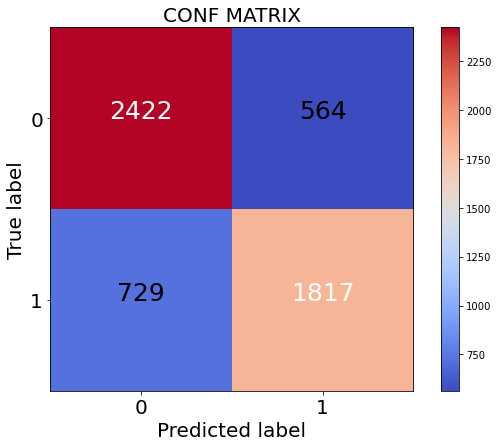

In [73]:
#get the predictions
pred_Random_Forest = rfc.predict(X_test)
 
#function for plotting confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')
        #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=25)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20) 
 
#confusion matrix
cnf_matrix = confusion_matrix(y_test,pred_Random_Forest)
np.set_printoptions(precision=2)
#print the precision, recall , accuracy and confusion matrix

from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Precision Score: {}\n'.format(precision_score(y_test,pred_Random_Forest)))
print('Recall Score: {}\n'.format(recall_score(y_test,pred_Random_Forest)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,pred_Random_Forest)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

# Grid Search CV

In [74]:
# import and instantiate the grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

fold = KFold(n_splits= 3, shuffle= True, random_state= 42)

param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 200, 300),
    'min_samples_split': range(200, 300, 400),
    'n_estimators': [50,100,200]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = fold, n_jobs = -1,verbose = 1)
 
#fit the grid (will take some time)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 300),
                         'min_samples_split': range(200, 300, 400),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [76]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
#We can get accuracy of 0.9990212644560995 using {'max_depth': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}
#lets predict with these parameters

random_final = RandomForestClassifier(bootstrap= True, 
                                      max_depth=12,
                                      min_samples_leaf=100, 
                                      min_samples_split=200,
                                      n_estimators=50)

random_final.fit(X_train,y_train)

We can get accuracy of 0.7167585695552532 using {'max_depth': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


RandomForestClassifier(max_depth=12, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=50)

Precision Score: 0.731390134529148

Recall Score: 0.6406127258444619

Accuracy Score: 0.7263195950831526



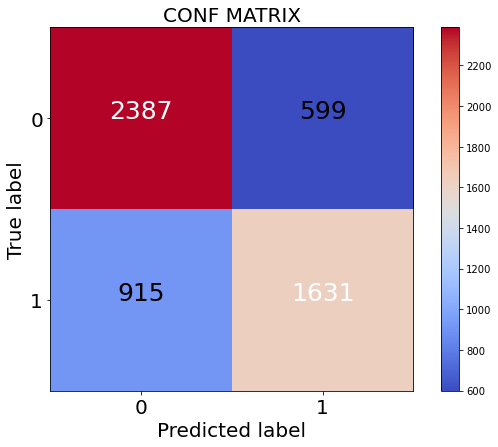

In [77]:
#make predictions with this model
pred_3 = random_final.predict(X_test)
 
#confusion matrix
conf_matt = confusion_matrix(y_test,pred_3)
#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,pred_3)))
print('Recall Score: {}\n'.format(recall_score(y_test,pred_3)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,pred_3)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_matt
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()
 


# Logistic Regression

C:\Users\US\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision Score: 0.683625730994152

Recall Score: 0.4591516103692066

Accuracy Score: 0.6532899493853941



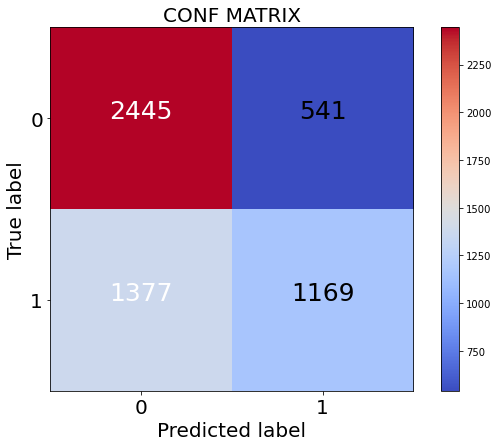

In [78]:
#lets use logistic regression model

from sklearn.linear_model import LogisticRegression

#after multiple runs below parameters seem to give the best restult. 

log_reg = LogisticRegression(C = 0.01, penalty= 'l2')

log_reg.fit(X_train,y_train)

pred_log_reg = log_reg.predict(X_test)

conf_mat = confusion_matrix(y_test,pred_log_reg)


#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,pred_log_reg)))
print('Recall Score: {}\n'.format(recall_score(y_test,pred_log_reg)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,pred_log_reg)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

# XGBoost

C:\Users\US\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision Score: 0.7446893787575151

Recall Score: 0.7297721916732128

Accuracy Score: 0.7604844540853217



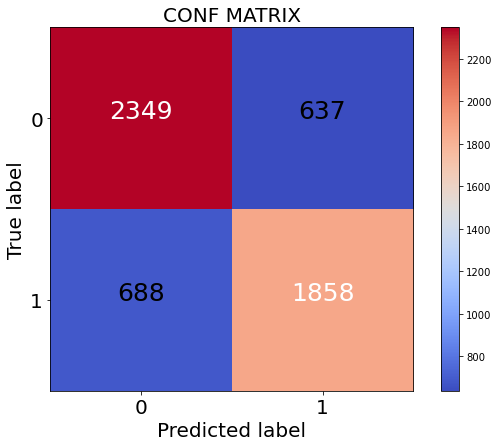

In [79]:
#making the imports
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#try xgboost with default parameters
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)

conf_mat = confusion_matrix(y_test,xgb_pred)

#print the precision, recall , accuracy and confusion matrix
print('Precision Score: {}\n'.format(precision_score(y_test,xgb_pred)))
print('Recall Score: {}\n'.format(recall_score(y_test,xgb_pred)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,xgb_pred)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()

# Hyper Parameter tuning for Xgboost

In [80]:
# hyperparameter tuning with XGBoost (will take some time to run)

# creating a KFold object 
folds = KFold(n_splits= 3, shuffle= True, random_state= 101)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, 
                       n_jobs= -1)
#fit the model
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\US\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
         

In [81]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.8246585330892856 using {'learning_rate': 0.6, 'subsample': 0.9}


[13:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\US\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Precision Score: 0.7189487070792708

Recall Score: 0.6661429693637078

Accuracy Score: 0.7265003615328995



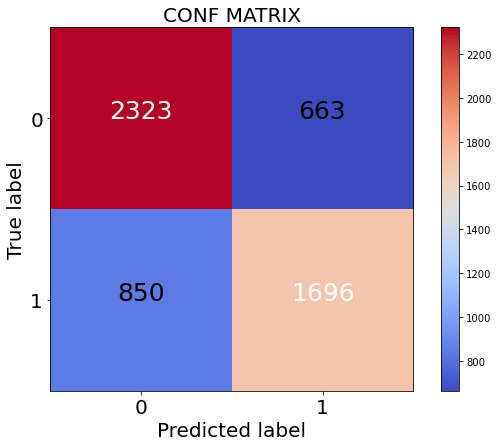

In [82]:
#lets use model with these parameters
xgb_model_2 = XGBClassifier(max_depth=2, n_estimators=200, learning_rate= 0.1, subsample= 0.6)
 
#lets make predictions using this model
xgb_model_2.fit(X_train,y_train)

xgb_pred = xgb_model_2.predict(X_test)

conf_mat = confusion_matrix(y_test,xgb_pred)


#print the precision, recall , accuracy and confusion matrix

print('Precision Score: {}\n'.format(precision_score(y_test,xgb_pred)))
print('Recall Score: {}\n'.format(recall_score(y_test,xgb_pred)))
print('Accuracy Score: {}\n'.format(accuracy_score(y_test,xgb_pred)))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize = (8,6))
plot_confusion_matrix(conf_mat
                      , classes=class_names
                      , title='CONF MATRIX')
plt.show()